*source file: https://github.com/FoxyChmoxyGuest/ML/blob/master/03_Supervised_Learning.ipynb*

**Exercise 1**

Use a different estimator on the same problem: sklearn.svm.SVC.

**Exercise 2**

Use the RandomForestRegressor object using IPython's help features

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

### Classification Example

In [7]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

result = knn.predict([[3, 5, 4, 2],])

iris.target_names[result][0]

'versicolor'

In [8]:
knn.predict_proba([[3, 5, 4, 2],])

array([[0. , 0.8, 0.2]])

(4.2, 8.0, 1.9, 4.5)

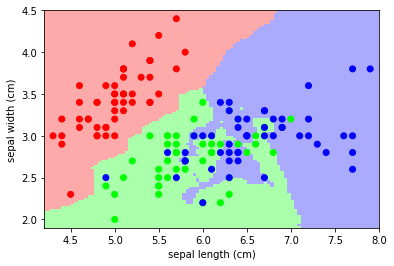

In [9]:
X = iris.data[:, :2]
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

### Regression Example

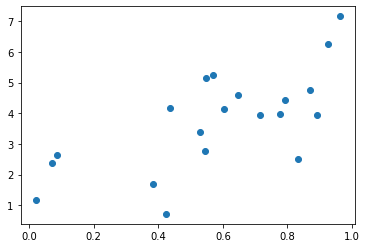

In [16]:
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

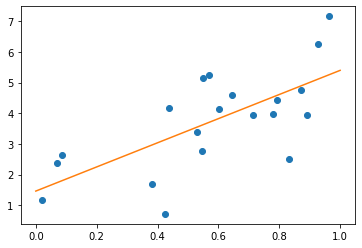

In [18]:
model = LinearRegression()
model.fit(X, y)

X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

In [20]:
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)